# Problem statement
You can download train and test dataset from here. This dataset has 4 classes. Labels for
training data are provided, you have to submit labels of test data. Feel free to use any Machine
learning or Deep learning technique.


In [6]:
#standard utilities
import os
import pickle #to load pickle data
from collections import Counter

#data science and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#scikit-learn utilities
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, accuracy_score, 
                             confusion_matrix)  

#deep learning library
import keras
from keras.models import Sequential, load_model
from keras.layers import (Conv2D, MaxPooling2D, 
                          Dense, Flatten, 
                          Dropout, BatchNormalization)
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator


In [15]:
path=r'..\CV_problem'
with open(f'{path}\\drive_data\\train_image.pkl', 'rb') as image_file:
    train_images = pickle.load(image_file)

In [17]:
train_labels = np.array(np.load(f'{path}\\drive_data\\train_label.pkl', allow_pickle=True))

In [23]:
print(len(train_images))
print(len(train_labels))


8000
8000


In [32]:
#we can see that the training dataset has 8000 samples
#now lets see what our traing dataset in first sample contains
print(type(train_images[0]))
print(len(train_images[0]))
#this is a list that contains 784 pixel values

<class 'list'>
784


In [28]:
#we can see that the training labels has 8000 samples
#now lets see what our traing labels in first sample contains
print(type(train_labels[0]))
print((train_labels[0]))
#this is an integer category only 


<class 'numpy.int32'>
0


In [30]:
#lets see what is the frequency of each label in the training labels
Counter(train_labels)

Counter({0: 2000, 2: 2000, 3: 2000, 6: 2000})

this is a very good dataset that contains the labels or the y_values in equal distribution

now we are known that training data has 8000 datapoint and the y_values which are categorical are also in equal distibution
in one of above cell we got to know that one datapoint has 784 values and there is no harm in assuming that the datapint is a 
vector flattened from 28*28 pixel matrix..   this also happens in MNIST dataset.. we can surely check our assumption by plotting the figure in next stage

In [37]:
#numpy array runs faster and consiering the size of the dataset it is best to convert into numpy array
train_images = np.array(train_images)

In [38]:
def plot_multiple_data(n_rows, n_columns, indices):
    '''
    Parameters-
        n_rows, n_columns: Number of rows and columns in the figure
        indices: List of indices for the images from the dataset
    '''
    #figure that will be displayed
    fig = plt.figure(figsize=(n_rows*2, n_columns*2))

    #Showing first n_rows*n_columns images from the dataset specified by indices
    for i in range(1, n_rows*n_columns + 1):
        plt.subplot(n_rows, n_columns, i)
        plt.imshow(train_images[indices[i]].reshape(28, 28))
        plt.title(f'Label: {train_labels[indices[i]]}') #corresponding label to each of the image
    fig.tight_layout()  #for better padding amongst subplots
    plt.show()

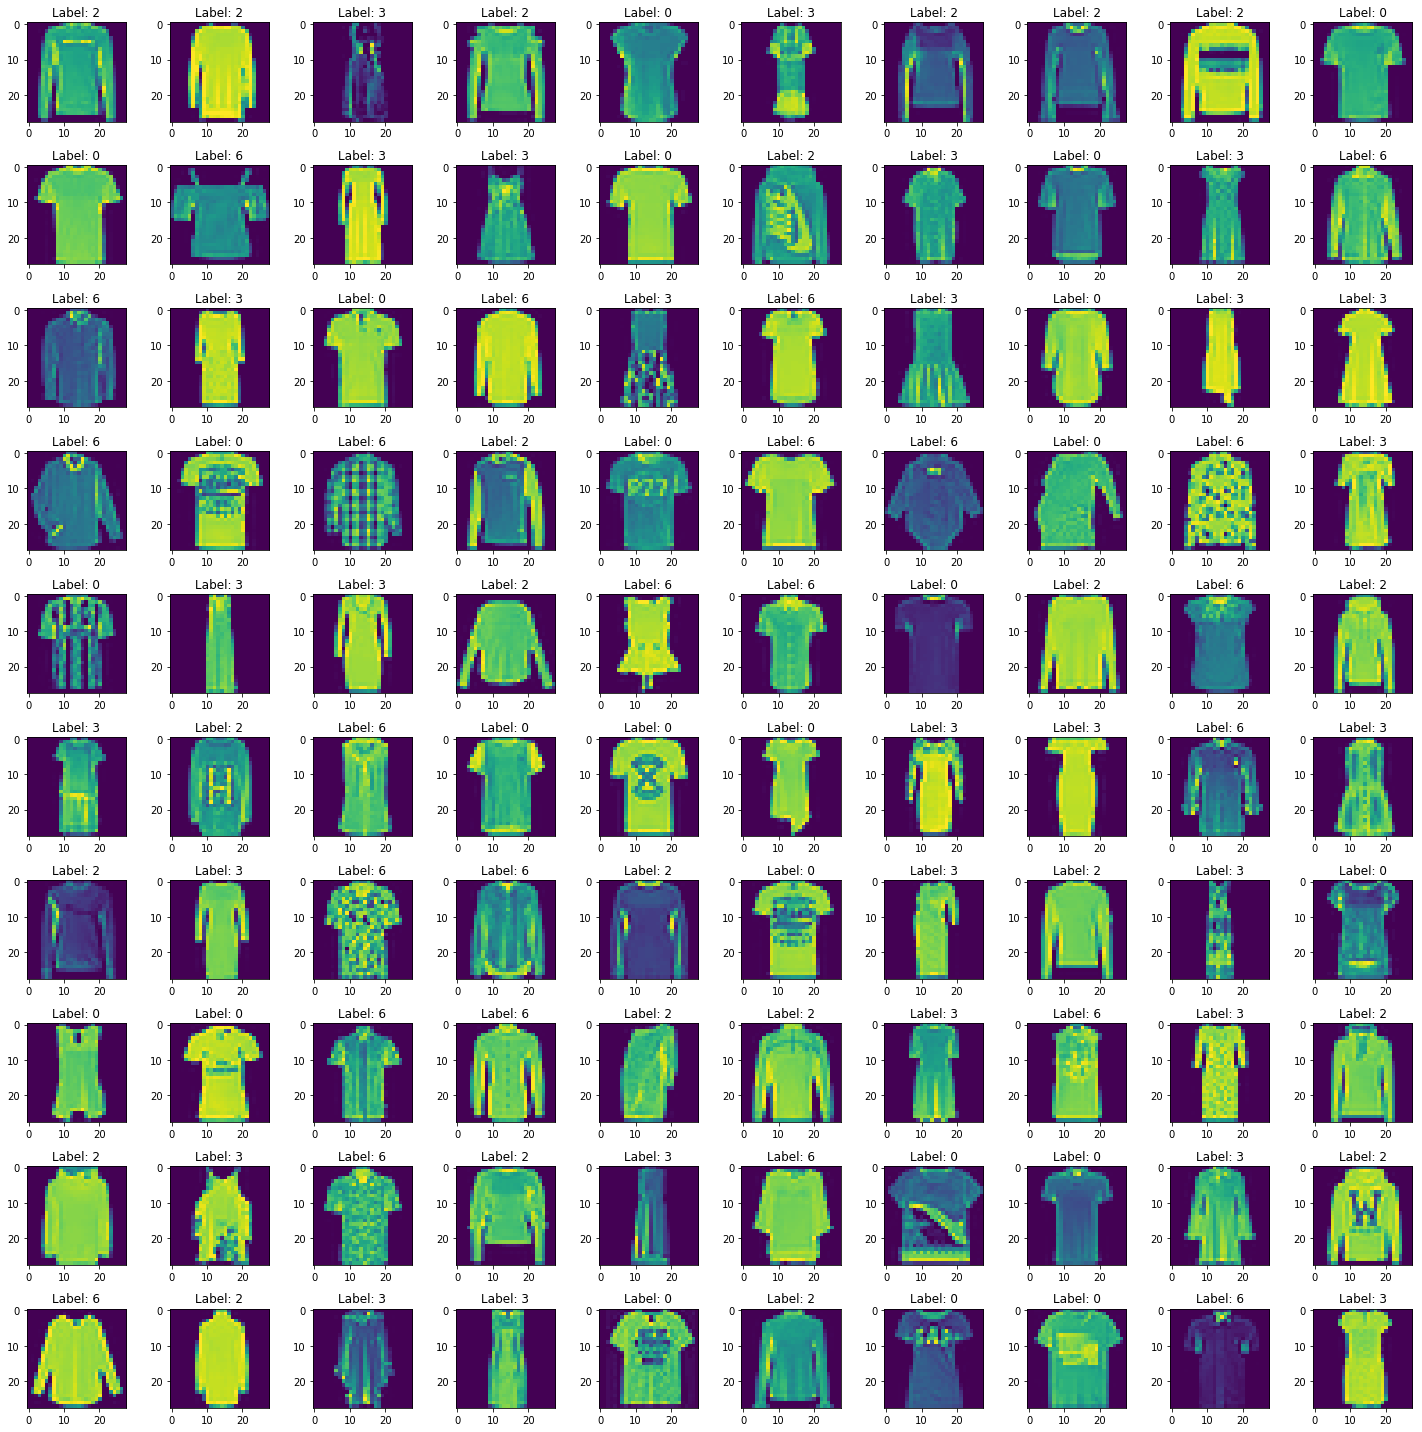

In [39]:
random_indices = np.random.permutation(train_images.shape[0]) #generate random indices for plotting
plot_multiple_data(10, 10, random_indices)
